# Project Overview: Aircraft Acquisition Risk Assessment
The project aims to explore the aviation sector through the acquisition of aircraft for both commercial and private use. While there is no prior experience in this field, the goal is to leverage data driven insights to guide the selection of aircraft models that will ensure optimal operational performance while minimizing risks. This project provides a comprehensive risk assessment of various aircraft models, evaluating key factors such as safety records, maintenance costs, operational performance, and historical incidents. By analyzing these factors, the project seeks to identify the aircraft models that offer the best balance of reliability, efficiency, and safety for both commercial and private operations.





# Business Understanding
Entering the aviation sector presents significant challenges, especially for those without prior experience in the field. The business goal is to mitigate potential risks through informed decision making derived from isights from data analysis of past historical data ensuring the acquisition of aircraft that offer high reliability, low maintenance costs, and strong safety records. The factors to be considered  for the aircraft acquisition are:
- Safety: Ensuring that aircraft have a strong safety history and low risk of operational incidents.
- Cost Efficiency: Identifying models with manageable maintenance and operational costs, contributing to long-term profitability.
- Performance: Selecting aircraft that are well-suited to the intended operations, with high reliability and minimal downtime.
This risk assessment will provide the necessary guidance to select the most appropriate aircraft models, minimizing financial and operational risks and ensuring successful entry into the aviation industry.





In [344]:
# Importing the necessary libraries needed to load, clean , analyze and visulize the data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [345]:
#Loading the CSV file into a pandas DataFrame using Latin-1 encoding to avoid Unicode errors
# the low_memory=False ensures that pandas reads the file once to prevent dtype warnings


aviation_df = pd.read_csv("Data\AviationData.csv", encoding='latin1', low_memory=False)

# Display the first 5 rows of the DataFrame to preview the data
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [346]:
# Convert event_date column to datetime format
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'])


# Extracting the year from the event_date column and creating a new column "Year"
aviation_df['Year'] = aviation_df['Event.Date'].dt.year
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


## Data Preparation

After successfully loading the aviation dataset, we begin by exploring the structure and content of the data. This step helps us understand what kind of information we are working with, how clean the data is, and what areas may require attention before analysis.




#### Dataset Overview

We first check the shape of the dataset, column names, data types, and a summary of the data using `.shape`, `.columns`, `.info()`, and `.describe()` methods.



In [347]:
# Get the number of rows and columns in the aviation dataset
aviation_df.shape

(88889, 32)

In [348]:
# View the column names in the dataset
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year'],
      dtype='object')

In [349]:
# See the information of the dataframe and the data types and count of non-null values for each column
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [350]:
## Replacing all periods in column names with underscores for consistency and easier access
aviation_df.columns = aviation_df.columns.str.replace('.', '_',)
aviation_df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date', 'Year'],
      dtype='object')

In [351]:
# showing the statistical summary of the data set
aviation_df.describe()

,Event_Date,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Year
count,88889,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000,88889.000000
mean,1999-09-17 17:13:39.354475904,1.146585,0.647855,0.279881,0.357061,5.325440,1999.206662
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2009.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,2022.000000
std,NaN,0.446510,5.485960,1.544084,2.235625,27.913634,11.888226


To gain more detailed insight into all columns both numerical and categorical  we use `describe(include="all")`. This provides a comprehensive view of how complete each column is and how diverse the entries are.

In [352]:
# Get summary statistics for all columns
aviation_df.describe(include="all")

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118,88889.000000
unique,87951,2,88863,NaN,27758,219,25589,27154,10374,24870,...,13590,NaN,NaN,NaN,NaN,4,12,17074,2924,NaN
top,20001212X19172,Accident,CEN22LA149,NaN,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020,NaN
freq,3,85015,2,NaN,434,82248,19,24,1488,240,...,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019,NaN
mean,NaN,NaN,NaN,1999-09-17 17:13:39.354475904,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN,1999.206662
min,NaN,NaN,NaN,1948-10-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1948.000000
25%,NaN,NaN,NaN,1989-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1989.000000
50%,NaN,NaN,NaN,1998-07-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1998.000000
75%,NaN,NaN,NaN,2009-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,2009.000000
max,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,349.000000,161.000000,380.000000,699.000000,NaN,NaN,NaN,NaN,2022.000000


## Data Cleaning and Transformation

#### Selected Columns for Analysis

To help identify the lowest risk aircraft for commercial and private operations, we selected the following columns based on relevance to incident severity and aircraft performance:

- **Make** – The manufacturer of the aircraft .
- **Model** – The specific aircraft model.
- **Injury_Severity** – Classification of the incident's outcome.
- **Total_Fatal_Injuries** – Number of fatalities resulting from the incident.
- **Total_Serious_Injuries** – Number of people who sustained serious (but non-fatal) injuries.
- **Total_Minor_Injuries** – Number of people who sustained minor injuries.
- **Total_Uninjured** – Number of people involved who were not injured.
- **Aircraft_damage** – The extent of the damage to the aircraft .
- **Purpose_of_flight** – The purpose of the flight when the incident occurred .
- **weather_Condition** -  Weather conditions during the incident.
- **Broad_phase_of_flight** - Phase of the flight

These features provide a wholistic view of safety, survivability, and incident patterns across different aircraft types.

In [353]:
selected_columns =  ['Make', 'Model', 'Injury_Severity', 'Total_Fatal_Injuries', 'Total_Serious_Injuries','Total_Minor_Injuries', 'Total_Uninjured','Aircraft_damage', 'Purpose_of_flight', 'Weather_Condition', 'Broad_phase_of_flight']

aviation_df[selected_columns].head()

,Make,Model,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Aircraft_damage,Purpose_of_flight,Weather_Condition,Broad_phase_of_flight
0,Stinson,108-3,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,Personal,UNK,Cruise
1,Piper,PA24-180,Fatal(4),4.0,0.0,0.0,0.0,Destroyed,Personal,UNK,Unknown
2,Cessna,172M,Fatal(3),3.0,NaN,NaN,NaN,Destroyed,Personal,IMC,Cruise
3,Rockwell,112,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,Personal,IMC,Cruise
4,Cessna,501,Fatal(1),1.0,2.0,NaN,0.0,Destroyed,Personal,VMC,Approach


In [354]:
# Checking for sum of  missing values
missing_values = aviation_df[selected_columns].isnull().sum()
print("Missing values per selected column:\n")
print(missing_values)

Missing values per selected column:

Make                         63
Model                        92
Injury_Severity            1000
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Aircraft_damage            3194
Purpose_of_flight          6192
Weather_Condition          4492
Broad_phase_of_flight     27165
dtype: int64


###  Handling Missing Values

To ensure our analysis is accurate and consistent, we filled in missing values for key columns in the dataset. Here's how missing data was addressed:

- **Make** and **Model**: If the aircraft manufacturer or model is missing, we fill it with `'unknown'`.
- **Injury_Severity**: Missing severity data is also filled with `'unknown'`.
- **Total_Fatal_Injuries**, **Total_Serious_Injuries**, **Total_Minor_Injuries**, **Total_Uninjured**: These numerical columns are filled with `0`, assuming no injuries or uninjured passengers were reported if data is missing.
- **Aircraft_damage**: If aircraft damage information is missing, we fill it with `'unknown'`.
- **Purpose_of_flight**: Any missing flight purpose is filled with `'unknown'`.
- **Weather_Condition**: Missing weather data is filled with 'unknown'.
- **Broad_Phase_of_Flight**: Missing flight phase data is filled with 'unknown'.

This step helps us prevent errors during analysis and ensures we don’t lose important records due to missing data.

In [355]:
# Fill missing values in the selected columns
aviation_df.fillna({
    'Make': 'unknown',                        # Fill missing aircraft manufacturers with 'unknown' for better clarity
    'Model': 'unknown',                       # Fill missing aircraft models with 'unknown' to handle unknown model cases
    'Injury_Severity': 'unknown',             # Fill missing injury severity information with 'unknown' to categorize unknown outcomes
    'Total_Fatal_Injuries': 0,                # Assume 0 fatalities if the data is missing, indicating no fatal injuries were reported
    'Total_Serious_Injuries': 0,              # Assume 0 serious injuries if data is missing
    'Total_Minor_Injuries': 0,                # Assume 0 minor injuries if no data is available
    'Total_Uninjured': 0,                     # Fill missing uninjured passengers with 0, assuming no passengers were uninjured
    'Aircraft_damage': 'unknown',             # Fill missing damage data with 'unknown' as we don't have details on the damage
    'Purpose_of_flight': 'unknown',           # Fill missing flight purpose data with 'unknown', which is helpful for categorizing flight intentions
    'Weather_Condition': 'unknown',           # Fill missing weather conditions with 'unknown' to handle cases where weather data is unavailable
    'Broad_phase_of_flight': 'unknown'        # Fill missing broad phase of flight data with 'unknown' to indicate undefined phases
}, inplace=True)

# Display the updated DataFrame with selected columns
aviation_df[selected_columns]

,Make,Model,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Aircraft_damage,Purpose_of_flight,Weather_Condition,Broad_phase_of_flight
0,Stinson,108-3,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,Personal,UNK,Cruise
1,Piper,PA24-180,Fatal(4),4.0,0.0,0.0,0.0,Destroyed,Personal,UNK,Unknown
2,Cessna,172M,Fatal(3),3.0,0.0,0.0,0.0,Destroyed,Personal,IMC,Cruise
3,Rockwell,112,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,Personal,IMC,Cruise
4,Cessna,501,Fatal(1),1.0,2.0,0.0,0.0,Destroyed,Personal,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...
88884,PIPER,PA-28-151,Minor,0.0,1.0,0.0,0.0,unknown,Personal,unknown,unknown
88885,BELLANCA,7ECA,unknown,0.0,0.0,0.0,0.0,unknown,unknown,unknown,unknown
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC,Non-Fatal,0.0,0.0,0.0,1.0,Substantial,Personal,VMC,unknown
88887,CESSNA,210N,unknown,0.0,0.0,0.0,0.0,unknown,Personal,unknown,unknown


In [356]:
# This line of code converts all text in the selected columns of the aviation_df to lowercase, while leaving numeric data unchanged.
aviation_df[selected_columns] = aviation_df[selected_columns].apply(lambda x: x.str.lower() if x.dtype == "object" else x)
aviation_df[selected_columns]

,Make,Model,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Aircraft_damage,Purpose_of_flight,Weather_Condition,Broad_phase_of_flight
0,stinson,108-3,fatal(2),2.0,0.0,0.0,0.0,destroyed,personal,unk,cruise
1,piper,pa24-180,fatal(4),4.0,0.0,0.0,0.0,destroyed,personal,unk,unknown
2,cessna,172m,fatal(3),3.0,0.0,0.0,0.0,destroyed,personal,imc,cruise
3,rockwell,112,fatal(2),2.0,0.0,0.0,0.0,destroyed,personal,imc,cruise
4,cessna,501,fatal(1),1.0,2.0,0.0,0.0,destroyed,personal,vmc,approach
...,...,...,...,...,...,...,...,...,...,...,...
88884,piper,pa-28-151,minor,0.0,1.0,0.0,0.0,unknown,personal,unknown,unknown
88885,bellanca,7eca,unknown,0.0,0.0,0.0,0.0,unknown,unknown,unknown,unknown
88886,american champion aircraft,8gcbc,non-fatal,0.0,0.0,0.0,1.0,substantial,personal,vmc,unknown
88887,cessna,210n,unknown,0.0,0.0,0.0,0.0,unknown,personal,unknown,unknown


In [357]:
# Setting default style for seaborn plots
sns.set(style="whitegrid")

# Defining the selected columns for analysis
selected_columns = ['Make', 'Model', 'Injury_Severity', 'Total_Fatal_Injuries', 
                    'Total_Serious_Injuries', 'Total_Minor_Injuries', 
                    'Total_Uninjured', 'Aircraft_damage', 'Purpose_of_flight', 
                    'Weather_Condition', 'Broad_phase_of_flight']

# Reloading the selected columns in the DataFrame
aviation_df[selected_columns]

# preview of selected_columns 
aviation_df[selected_columns].head()

,Make,Model,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Aircraft_damage,Purpose_of_flight,Weather_Condition,Broad_phase_of_flight
0,stinson,108-3,fatal(2),2.0,0.0,0.0,0.0,destroyed,personal,unk,cruise
1,piper,pa24-180,fatal(4),4.0,0.0,0.0,0.0,destroyed,personal,unk,unknown
2,cessna,172m,fatal(3),3.0,0.0,0.0,0.0,destroyed,personal,imc,cruise
3,rockwell,112,fatal(2),2.0,0.0,0.0,0.0,destroyed,personal,imc,cruise
4,cessna,501,fatal(1),1.0,2.0,0.0,0.0,destroyed,personal,vmc,approach


# 1.Aircraft Models with the Highest Fatal Injuries
We will be grouping aviation_df by both Make and Model columns, then calculate the total number of fatal injuries (Total_Fatal_Injuries) for each aircraft combination.
The results will sorted in descending order, meaning aircraft models with the highest number of fatal injuries appeared at the top.

FileNotFoundError: [Errno 2] No such file or directory: 'Visualizations/bargraph.png'

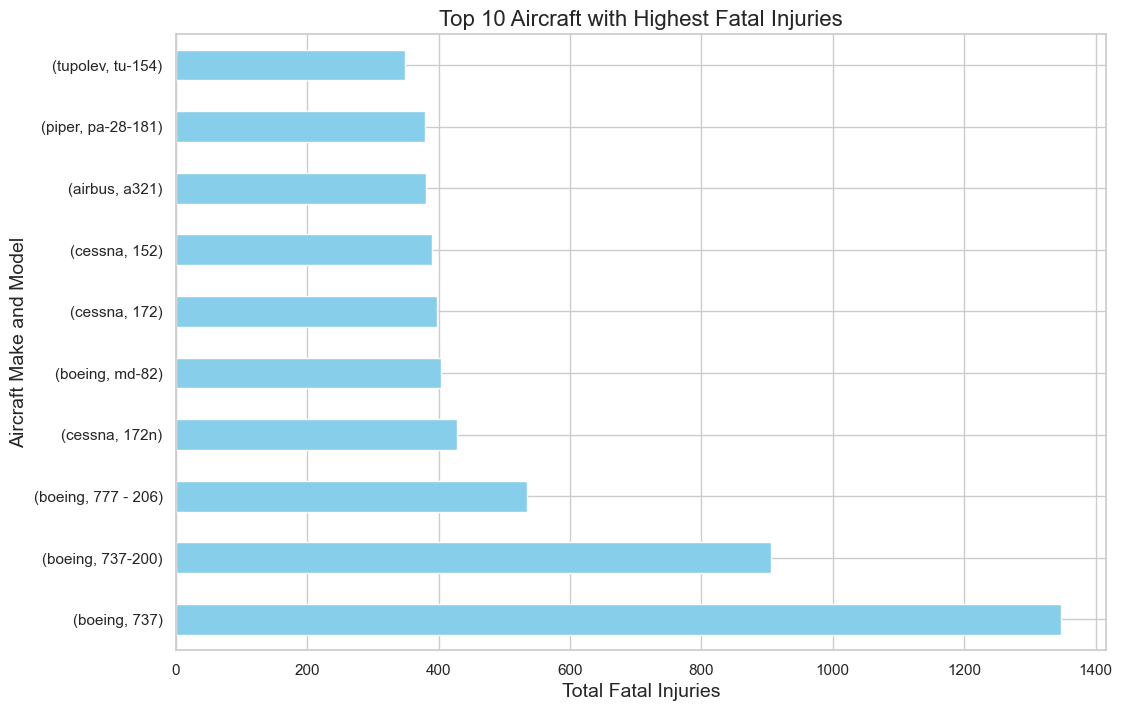

In [358]:
# Group the dataset by 'Make' and 'Model' columns
# Sum the 'Total_Fatal_Injuries' for each aircraft type
# Sort the results in descending order to get aircraft with the highest fatalities first
fatal_injuries_by_model = aviation_df.groupby(['Make', 'Model'])['Total_Fatal_Injuries'].sum().sort_values(ascending=False)

# Create a new figure for plotting
plt.figure(figsize=(12, 8))

# Plot a horizontal bar chart for the top 10 aircraft models with the most fatal injuries
fatal_injuries_by_model.head(10).plot(kind='barh', color='skyblue')

# Add a title to the plot
plt.title('Top 10 Aircraft with Highest Fatal Injuries', fontsize=16)

# Label the x-axis
plt.xlabel('Total Fatal Injuries', fontsize=14)

# Label the y-axis
plt.ylabel('Aircraft Make and Model', fontsize=14)

#Export the graph
plt.savefig( "Visualizations/bargraph.png",  dpi=500, bbox_inches="tight", facecolor='white',  transparent=False) 


# Display the plot
plt.show()



### Conclusion of Analysis
The bar chart highlights key insights about aviation safety by aircraft type, Flight models such as boeing ,737, boeing 737-200, boeing 777-206 have high total fatal injuries as compared to other aircraft makes and model. THis may be attributed to either safety concerns or prevalent use of these specific models over many years and heavy usage. The boeing 737 is quite dominant in total number of  fatal injuries suggesting caution should be taken before acquistion of this flight. Aircraft models with higher fatal injury counts needs to be investigated further on factors such as flight frequency, maintenance practices, and operational environments must be considered before making broad safety judgments to determine whether the fatal injuries are from external factors or from usage patterns or design 

# 2. Grouping Injury-Related Data by Aircraft Make and Model
We are grouping the dataset by **Make** and **Model** to analyze injury-related data, which will help us understand the severity of the accidents associated with different aircrafts. 

We will calculate:
- **Total number of incidents** (`count`) and **total fatalities** (`sum`) for each Make and Model.
- The **most common injury severity** (using mode).
- The **sum of serious injuries**, **minor injuries**, and **uninjured passengers** to get a clearer idea of the severity of each incident.

This aggregation will allow us to evaluate aircraft risk based on the outcomes of accidents involving them.

In [ ]:
# Group by aircraft Make and Model to analyze injury-related data. 
# Introducing a variable called grouped_injury_df that stores a summary of the aviation_df by grouping by Make and Model and then aggregating the grouped data by count, sum, and mode.

grouped_injury_df = aviation_df.groupby(['Make', 'Model']).agg({
    'Total_Fatal_Injuries': ['count', 'sum'],           # Count of incidents & total fatalities
    'Injury_Severity': lambda x: x.mode()[0],            # Most common severity
    'Total_Serious_Injuries': 'sum',                     # Sum of serious injuries
    'Total_Minor_Injuries': 'sum',                       # Sum of minor injuries
    'Total_Uninjured': 'sum'                             # Sum of uninjured passengers
})

# Flatten MultiIndex column names
# Flattening the column names returns the data into strings as multiindex columns are hard to work with as they come as tuples 
grouped_injury_df.columns = ['Total_Incidents', 'Total_Fatalities', 'Most_Common_Severity',
                             'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']


# Reset Index returns Make and Model as normal columns again, and resets the index to simple row numbers
grouped_injury_df = grouped_injury_df.reset_index()

# call the df 
grouped_injury_df.head(10)

,Make,Model,Total_Incidents,Total_Fatalities,Most_Common_Severity,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,107.5 flying corporation,one design dr 107,1,1.0,fatal(1),0.0,0.0,0.0
1,1200,g103,1,0.0,non-fatal,1.0,0.0,0.0
2,177mf llc,pitts model 12,1,0.0,non-fatal,2.0,0.0,0.0
3,1977 colfer-chan,steen skybolt,1,0.0,non-fatal,0.0,1.0,0.0
4,1st ftr gp,focke-wulf 190,1,1.0,fatal(1),0.0,0.0,0.0
5,2000 mccoy,genesis,1,1.0,fatal(1),0.0,0.0,0.0
6,2001 mcgirl,questair venture,1,0.0,non-fatal,1.0,0.0,0.0
7,2003 nash,kitfox ii,1,0.0,non-fatal,0.0,1.0,0.0
8,2007 savage air llc,epic lt,1,0.0,non-fatal,0.0,0.0,4.0
9,2021fx3 llc,ccx-2000,2,0.0,non-fatal,0.0,0.0,4.0


### Code Explanation

1. **Group by and Aggregate**:
   The `groupby()` method groups the DataFrame by the `Make` and `Model` columns. Afterward, the `agg()` function applies multiple aggregation functions that is 'count`, `sum`, `mode` to various columns, creating a **MultiIndex** in the columns.
   
   In simple terms this code groups the dataset by **Make** and **Model** and then aggregates the data to :
   
- **Count of incidents** (`Total_Fatal_Injuries`: 'count') is calculated to see how many incidents each Make/Model has been involved in.
- **Total fatalities** (`Total_Fatal_Injuries`: 'sum') helps assess the overall danger posed by each aircraft type.
- **Most common injury severity** is determined using `.mode()` to identify the most frequently occurring injury severity for each Make and Model.
- **Sum of serious injuries**, **minor injuries**, and **uninjured passengers** give an overview of the impact of these incidents.
The MultiIndex in the result is flattened to make it easier to interpret the output.




In [ ]:
# Check the column names in the DataFrame
print(grouped_injury_df.columns.tolist())


['Make', 'Model', 'Total_Incidents', 'Total_Fatalities', 'Most_Common_Severity', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']


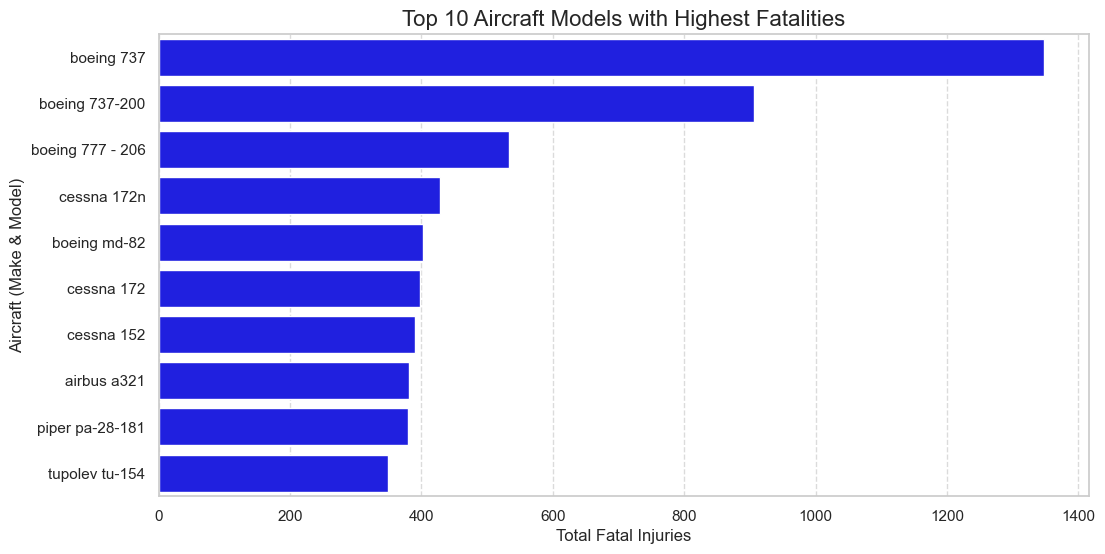

In [ ]:

# Aggregate and sort data based on 'Total_Fatal_Injuries'
top_fatalities = aviation_df.groupby(['Make', 'Model']).agg({'Total_Fatal_Injuries': 'sum'}).reset_index()

# Sort in descending order and select top 10 with the highest fatalities
top_fatalities = top_fatalities.sort_values('Total_Fatal_Injuries', ascending=False).head(10)

# Combine Make and Model into one column 
top_fatalities['Make_Model'] = top_fatalities['Make'] + ' ' + top_fatalities['Model']

# Create a new figure for plotting
plt.figure(figsize=(12, 6))

# Create a barplot for the top 10 aircraft with the highest fatalities
sns.barplot(data=top_fatalities, x='Total_Fatal_Injuries', y='Make_Model', color='blue')

# set title for the plot
plt.title('Top 10 Aircraft Models with Highest Fatalities', fontsize=16)

# Label x-axis
plt.xlabel('Total Fatal Injuries')

# Label y- axis 
plt.ylabel('Aircraft (Make & Model)')\

# add the grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

#Export the graph
plt.savefig( "Visualizations/bargraph1.png",  dpi=500, bbox_inches="tight", facecolor='white',  transparent=False) 

# Display plot
plt.show()

#### Conclusion of Analysis:

The analysis highlights the Top 10 Aircraft Models with the Highest Fatalities. By combining the aircraft make and model, the visualization identifies which models are linked to the most fatalities. This information can guide safety improvements, inform regulatory focus, and direct resources toward higher-risk aircraft. Further research into factors like Injury Severity, Aircraft Damage, and Weather Conditions could provide deeper insights into these trends.


### 3.Grouping and Aggregating Aircraft Damage and Purpose of Flight Data 
Next, we group by **Make** and **Model** to analyze aircraft damage and purpose of flight. This will help us assess the risk factors related to aircraft performance and usage context.

We will calculate:
- The **total count** of each **Aircraft damage type** .
- The **most common purpose of flight** .

This helps us understand the extent of damage each aircraft type is prone to and if certain purposes of flight contribute to higher risks.

In [ ]:

# Group the data by 'Make' and 'Model' and aggregate using the mode
grouped_damage_purpose_df = aviation_df.groupby(['Make', 'Model']).agg({
    'Aircraft_damage': lambda x: x.mode()[0],        # Most common damage type for each aircraft type
    'Purpose_of_flight': lambda x: x.mode()[0]       # Most common purpose of flight for each aircraft type
})

# Reset index to make Make and Model as columns again
grouped_damage_purpose_df = grouped_damage_purpose_df.reset_index()

# Create Make_Model column 
grouped_damage_purpose_df['Make_Model'] = grouped_damage_purpose_df['Make'] + ' ' + grouped_damage_purpose_df['Model']

# show the df 
grouped_damage_purpose_df.head(10)



,Make,Model,Aircraft_damage,Purpose_of_flight,Make_Model
0,107.5 flying corporation,one design dr 107,destroyed,personal,107.5 flying corporation one design dr 107
1,1200,g103,substantial,personal,1200 g103
2,177mf llc,pitts model 12,substantial,personal,177mf llc pitts model 12
3,1977 colfer-chan,steen skybolt,substantial,personal,1977 colfer-chan steen skybolt
4,1st ftr gp,focke-wulf 190,destroyed,personal,1st ftr gp focke-wulf 190
5,2000 mccoy,genesis,destroyed,flight test,2000 mccoy genesis
6,2001 mcgirl,questair venture,destroyed,flight test,2001 mcgirl questair venture
7,2003 nash,kitfox ii,substantial,personal,2003 nash kitfox ii
8,2007 savage air llc,epic lt,minor,personal,2007 savage air llc epic lt
9,2021fx3 llc,ccx-2000,substantial,personal,2021fx3 llc ccx-2000


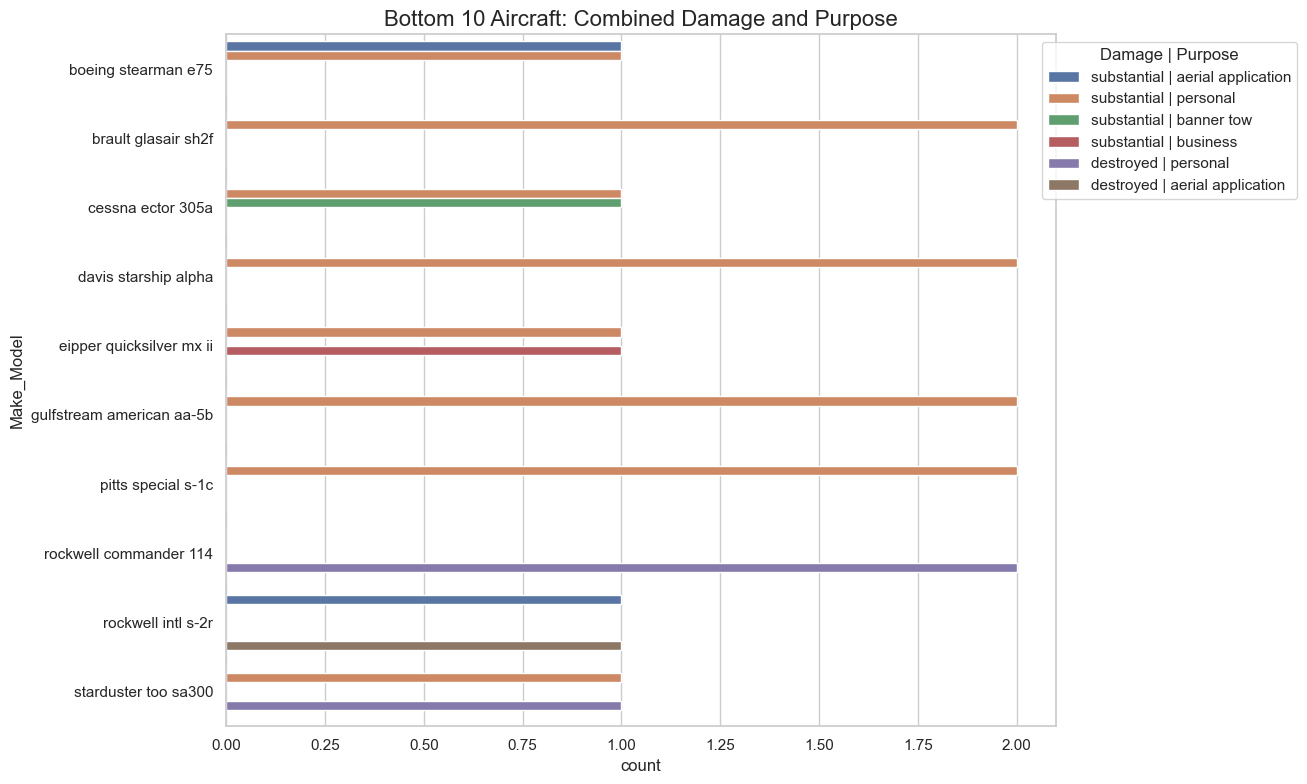

In [ ]:
# Create a new figure for plotting
plt.figure(figsize=(14, 8))

# Creating plot with two hue variables directly
ax = sns.countplot(data=bottom_data,
                 y='Make_Model',
                 hue=bottom_data['Aircraft_damage'].astype(str) + " | " + bottom_data['Purpose_of_flight'].astype(str),
                 order=bottom_10,
                )

# add the legend 
plt.legend(title='Damage | Purpose', bbox_to_anchor=(1.3, 1))

# set the title for the plot
plt.title('Bottom 10 Aircraft: Combined Damage and Purpose', fontsize=16)

# Adjust layout to prevent overlap of plot elements
plt.tight_layout()

#Export the graph
plt.savefig( "Visualizations/countplot.png",  dpi=500, bbox_inches="tight", facecolor='white',  transparent=False) 

#Display the plot
plt.show()

## Conclusion of Aanlysis

The analysis of Aircraft Damage and Purpose of Flight by Make & Model reveals key insights into safety patterns. We observed which aircraft models are associated with specific damage types and flight purposes.

Aircraft Damage: Some aircraft models are more prone to certain damage types, suggesting the need for targeted safety improvements or operational adjustments.

Purpose of Flight: Certain aircraft are more frequently used for high-risk purposes like training or testing, highlighting the importance of tailored safety measures for these scenarios.

In summary, combining damage data with flight purpose provides a clearer view of risks associated with specific aircraft, guiding better safety practices and operational decisions.


# 4. Visualizing the Total Number of Incidents by Aircraft Make and Model
###  Total Number of Incidents by Aircraft Make and Model ranging from the highest to the least and the least to the highest
This visualization will help us understand which aircraft makes and models are involved in the highest number of incidents and those in the least number of incidents. By visualizing this data, we can identify the most and least risky aircraft in terms of the frequency of incidents.

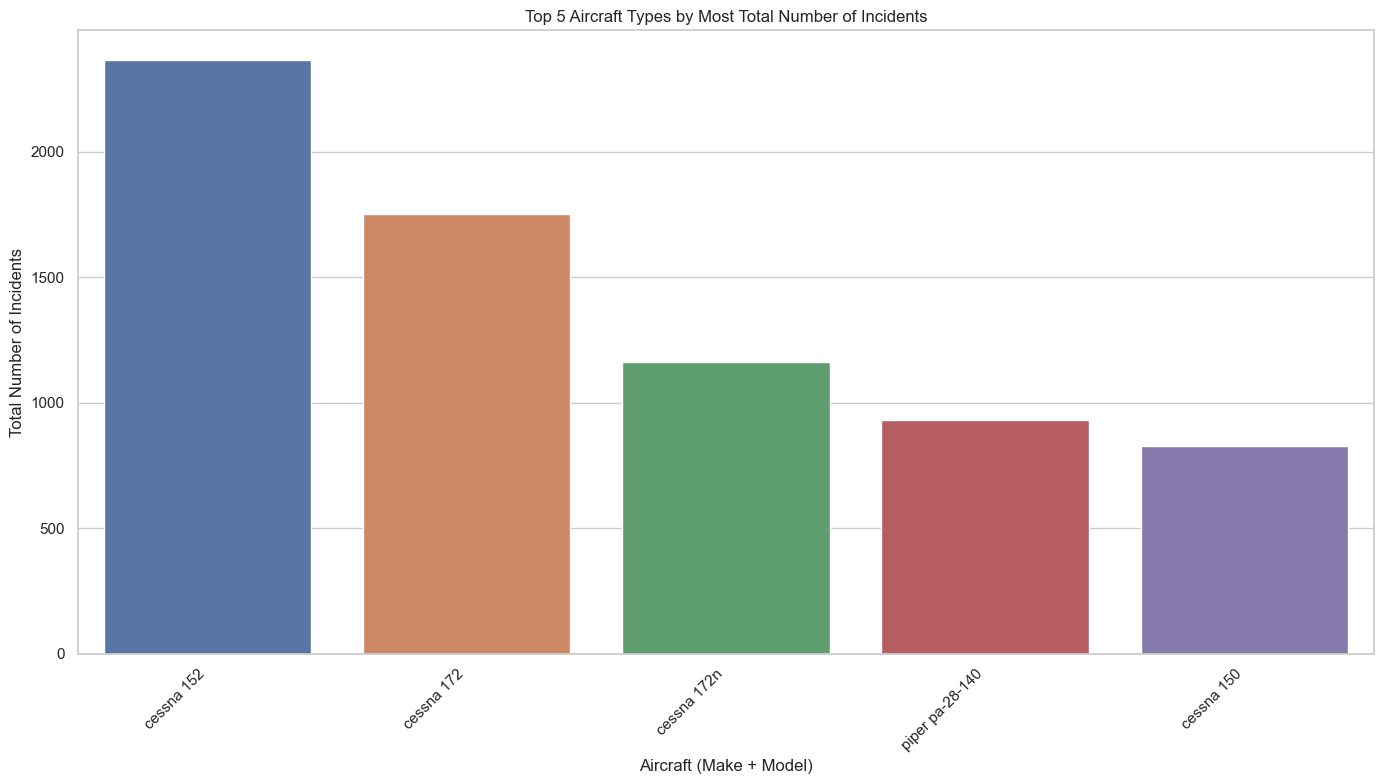

In [ ]:
# Fill missing values first
aviation_df['Model'] = aviation_df['Model'].fillna('')

# Combine 'Make' and 'Model' to create a new identifier for each aircraft
aviation_df['Make_Model'] = aviation_df['Make'] + ' ' + aviation_df['Model']

# Group the data by 'Make_Model' and count the total number of incidents
grouped_injury_df = aviation_df.groupby('Make_Model').size().reset_index(name='Total_Incidents')

# Sort the grouped dataframe by 'Total_Incidents' in descending order and keep only the top 5
top_5_df = grouped_injury_df.sort_values(by='Total_Incidents', ascending=False).head(5)

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plot a vertical bar chart
sns.barplot(x='Make_Model', y='Total_Incidents', data=top_5_df)

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Set the plot title and axis labels
plt.title('Top 5 Aircraft Types by Most Total Number of Incidents')
plt.xlabel('Aircraft (Make + Model)')
plt.ylabel('Total Number of Incidents')

# Adjust layout to prevent label cutoff
plt.tight_layout()

#Export the graph
plt.savefig( "Visualizations/bargraph3.png",  dpi=500, bbox_inches="tight", facecolor='white',  transparent=False) 

# Show the plot
plt.show()



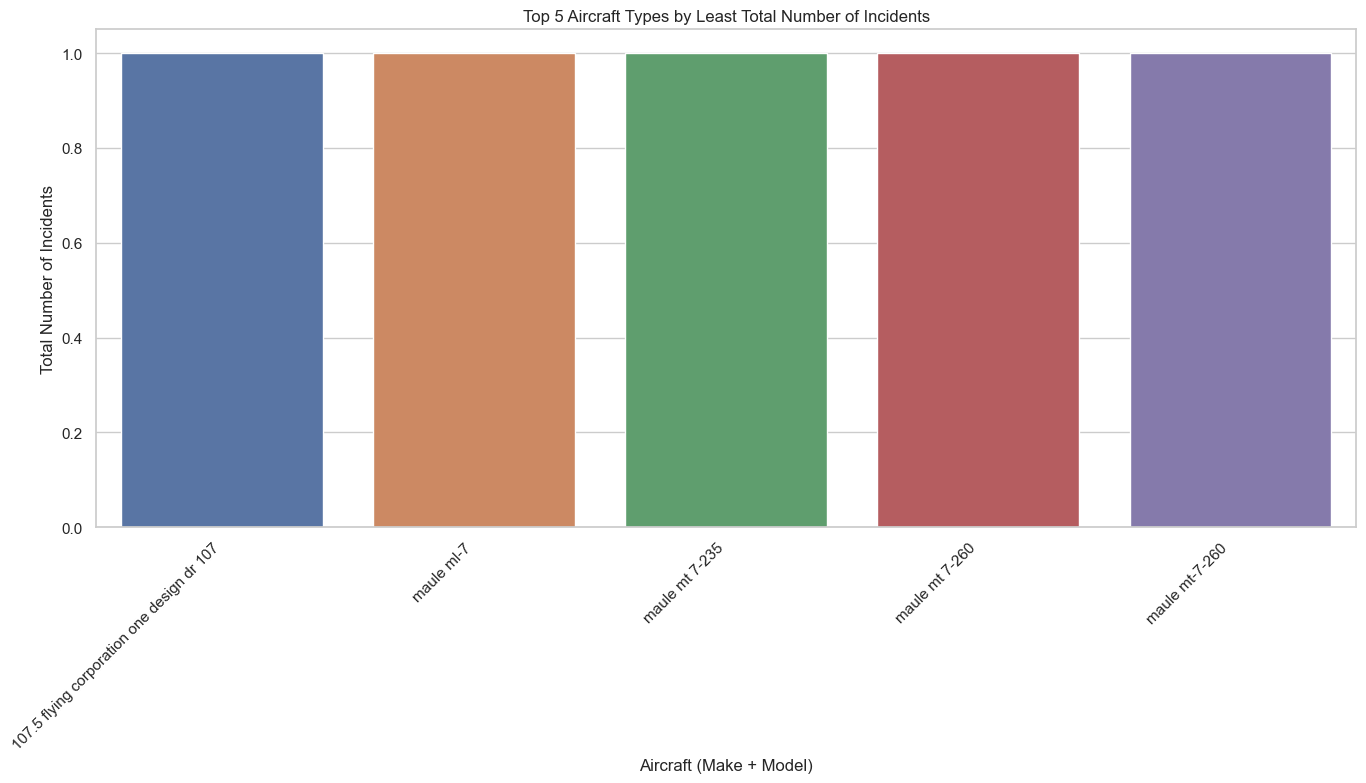

In [ ]:
# Ensuring 'Model' has no missing values
aviation_df['Model'] = aviation_df['Model'].fillna('')

# Create 'Make_Model' by combining 'Make' and 'Model'
aviation_df['Make_Model'] = aviation_df['Make'] + ' ' + aviation_df['Model']

# Group the data by 'Make_Model' and count total incidents
grouped_injury_df = aviation_df.groupby('Make_Model').size().reset_index(name='Total_Incidents')

# Sort the grouped dataframe by total incidents in ascending order and pick the bottom 5
bottom_5_df = grouped_injury_df.sort_values(by='Total_Incidents', ascending=True).head(5)

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plot a vertical bar chart using seaborn
sns.barplot(x='Make_Model', y='Total_Incidents', data=bottom_5_df)

# Rotate the x labels 
plt.xticks(rotation=45, ha='right')

# Set plot title 
plt.title('Top 5 Aircraft Types by Least Total Number of Incidents')

# set xlabel
plt.xlabel('Aircraft (Make + Model)')

# set ylabel
plt.ylabel('Total Number of Incidents')

# Adjust layout to prevent label cutoff
plt.tight_layout()

#Export graph
plt.savefig( "Visualizations/bargraph4.png",  dpi=500, bbox_inches="tight", facecolor='white',  transparent=False) 

# Display the plot
plt.show()

#### Conclusion of Analysis on Aircraft Types by Total number of Accidents 

 From the bar chart of the total number of incidents by Make and Model, we notice that certain manufacturers for example cesna 152, cesna 172, cesna 172n, piper pa-28-140  report more incidents compared to others.
 While on the other end manufacturers like 107.5 flying corporation one design dr 107, maule mt7-235, maule mx 7-180, maule mx 7-180b , maule mx-7-180c report less incidents compared to other aircrfat makes and models.
The makes and models with high incidents contribute significantly to aviation accident data, underscoring the need to investigate further into factors such as usage patterns, maintenance practices, and potential design challenges associated with these specific makes to enhance safety measures








## 5.Top 10 Aircraft Types by Total Number of Incidents

This visualization identifies the top 10 aircraft types based on a combination of manufacturer **Make** and **Model** that have experienced the highest number of reported incidents. This insight helps the company understand which aircraft types are most frequently involved in incidents  an important consideration for risk assessment before procurement.

We combine the `Make` and `Model` columns to create unique aircraft identifiers. Then, we sort by the total number of incidents and plot a bar chart for the top 10 entries. This visual can guide decision-makers in identifying aircraft models that may require further investigation regarding safety and operational reliability.



### Damage Type by Aircraft
The chart shows, for each of the top 5 aircraft models (Make + Model) by incidents, the most frequent damage classification . Understanding which aircraft suffer severe damage most often helps gauge maintenance and replacement risk.

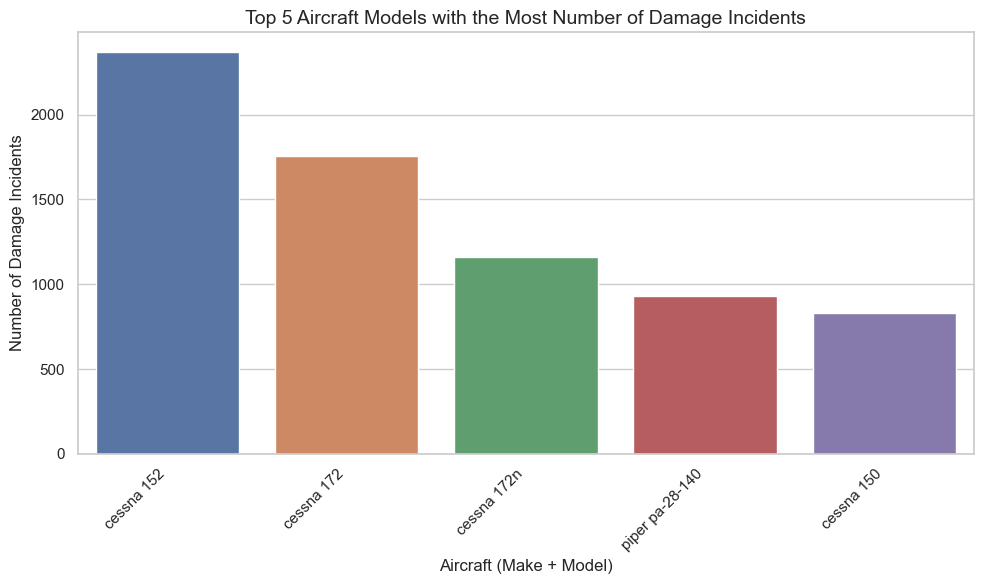

In [ ]:
# Fill missing model names with an empty string 
aviation_df['Model'] = aviation_df['Model'].fillna('')

# Create a new column 'Make_Model' by combining 'Make' and 'Model'
aviation_df['Make_Model'] = aviation_df['Make'] + ' ' + aviation_df['Model']

# Group by 'Make_Model' and count number of damage incidents, selecting the top 5 aircraft models with MOST damage incidents
top10_aircraft = aviation_df.groupby('Make_Model')['Aircraft_damage'].count().nlargest(5).index

# Filter the DataFrame to show top 10 aircraft models
filtered_df = aviation_df[aviation_df['Make_Model'].isin(top10_aircraft)]

# Count number of incidents for each top 10 aircraft
incident_counts = filtered_df.groupby('Make_Model')['Aircraft_damage'].count().reset_index()

# Sort the data 
incident_counts = incident_counts.sort_values(by='Aircraft_damage', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set plot size
sns.barplot(data=incident_counts, x='Make_Model', y='Aircraft_damage')

# Rotate the x-axis labels so they don't overlap
plt.xticks(rotation=45, ha='right')

# Add titles and axis labels
plt.title('Top 5 Aircraft Models with the Most Number of Damage Incidents', fontsize=14)
plt.xlabel('Aircraft (Make + Model)', fontsize=12)
plt.ylabel('Number of Damage Incidents', fontsize=12)

# Make sure everything fits
plt.tight_layout()

#Export the graph
plt.savefig( "Visualizations/bargraph5.png",  dpi=500, bbox_inches="tight", facecolor='white',  transparent=False) 

# Show the final plot
plt.show()


### Conclusion of Analysis of Damage Type by Aircraft Make and Model
When looking at the distribution of Aircraft Damage types across different aircraft, certain models show higher rates of damage compared to minor damages such models are aeronca champion 7ac , ayres thrush 2sr , bellanca citabria 7eca while on the other end of the spectrum we have 107.5 flying corporation one design dr 107, 1200 g103, 177 mf llc pits model 12
Aircraft makes and models with a higher proportion of minor damage incidents compared to substantial or destroyed could indicate better resilience during incidents, and might be preferable for starting the aviation business.


### 6. Accidents by Weather Condition

The following analysis visualizes the number of accidents categorized by different weather conditions. By examining this data, we can better understand how weather conditions influence the frequency of aviation accidents.

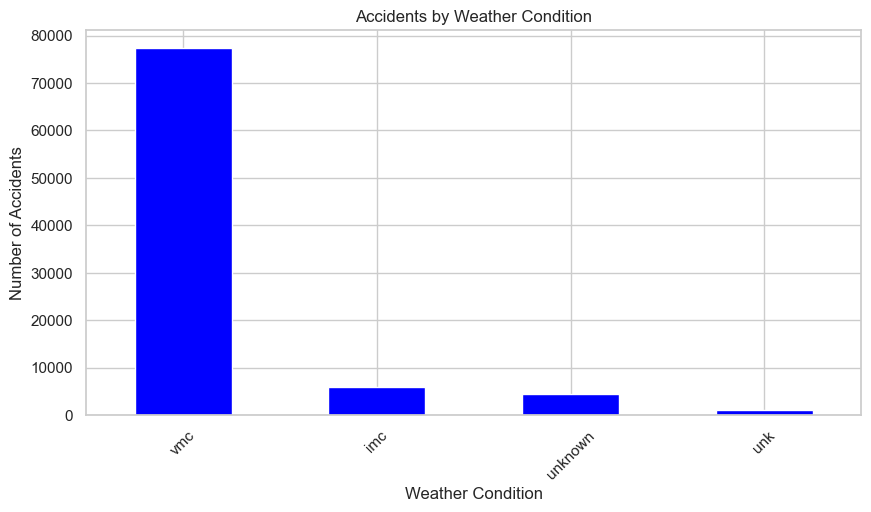

In [ ]:
#Accidents by weather condition

weather_conditions = aviation_df['Weather_Condition'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 5))
weather_conditions.plot(kind='bar', title='Accidents by Weather Condition', color='blue')

# add xlabel
plt.xlabel('Weather Condition')

# add ylabel
plt.ylabel('Number of Accidents')

# add xtics 
plt.xticks(rotation=45)

#Export the graph
plt.savefig( "Visualizations/bargraph6.png",  dpi=500, bbox_inches="tight", facecolor='white',  transparent=False) 

#Display the plot
plt.show()



### Conclusion of Analysis

The analysis of accidents by weather condition reveals the impact of various weather conditions on the frequency of aviation accidents. By visualizing the data, we can identify specific weather conditions that contribute to higher accident rates. From the visualization above weather condition denoted as vmc tends to be related to high number of accidents while unk is is related to low accident rates. This insight can inform safety measures, highlighting the importance of weather awareness in aviation operations. Understanding these trends is essential for improving risk management and enhancing pilot preparedness in challenging weather conditions.

### 7.Causes of Accidents by Phase of Flight

The following analysis visualizes the number of aviation accidents categorized by the phase of flight. This visualization helps us understand which flight phases (such as takeoff, cruise, or landing) are most associated with accidents. By examining this data, we can identify the flight phases that require more attention for safety improvements.

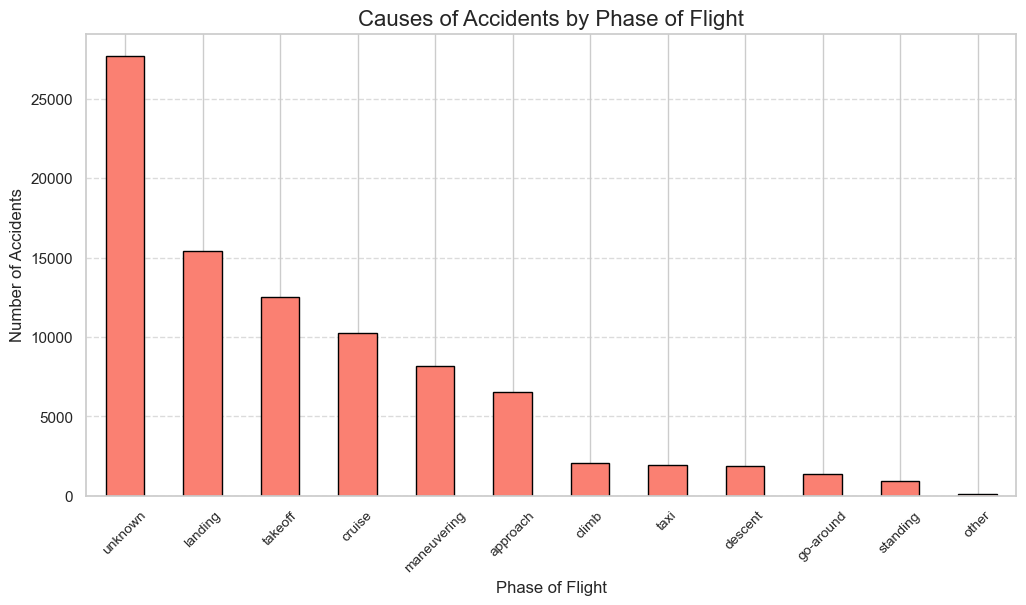

In [ ]:
causes = aviation_df['Broad_phase_of_flight'].value_counts()

# Plot as a bar chart
plt.figure(figsize=(12, 6))
causes.plot(kind='bar', color='salmon', edgecolor='black')

# Add title 
plt.title('Causes of Accidents by Phase of Flight', fontsize=16)

# add xlabel
plt.xlabel('Phase of Flight', fontsize=12)

# add ylabel
plt.ylabel('Number of Accidents', fontsize=12)

# plot xtics
plt.xticks(rotation=45, fontsize=10)

# pltot grid 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Export the graph
plt.savefig( "Visualizations/bargraph7.png",  dpi=500, bbox_inches="tight", facecolor='white',  transparent=False) 

# Display the bar chart
plt.show()

### Conclusion of Analysis

The analysis of accidents by the phase of flight highlights that unknown stages, landing , takeoff , cruise , maneuvering are the stages  most commonly associated with accidents. By visualizing the data, we can identify phases of flight that may require additional safety measures or training to reduce risk. This insight is crucial for enhancing flight safety protocols, ensuring that pilots and crew are better prepared during high-risk phases, such as takeoff, landing, or cruising.

# Recommendations 

Based on the data analysis and visualizations, the following recommendations are made for the company's entry into the aviation industry:
1. Prioritize Aircraft with Lower Incident Rates and Fatalities
Focus on purchasing aircraft models with lower total fatal injuries and fewer overall incidents. Aircraft like Maule MX-7-180 and 107.5 fying corporation One Design DR 107 exhibit significantly lower accident rates compared to others ;like boeing 737, cesna 152 , making them safer choices for commercial and private operations. Selecting aircraft with proven safety records will minimize risk exposure and improve operational reliability.

2. Choose Aircraft with Higher Resilience to Damage
Select aircraft models that tend to sustain minor damage more often than substantial or destroyed damage such as boeing stearman e75, cessna ector 3059 . This suggests better resilience in the event of an incident. For instance, aircraft like the Maule MX-7-180, which show higher proportions of minor damage, indicate better durability and lower long-term repair costs, making them ideal for both safety and cost-efficiency in operations.

3. Monitor Aircraft Performance by Weather and Flight Phases
Given that weather conditions and phases of flight significantly influence accident rates, prioritize aircraft that perform well under various conditions. Aircraft models that are associated with lower accident rates during adverse weather or critical phases of flight takeoff and landing should be prioritized. For example, models that show resilience in varying weather conditions, such as Cessna 172, should be considered, while aircraft types with higher accident frequencies in challenging conditions should be avoided. This will help ensure safer operations across a wide range of environments and operational conditions.



